# W6 Lab Assignment

Deep dive into Histogram and boxplot.

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pylab
sns.set_style('white')

%matplotlib inline 

# Histogram


Let's revisit the table from the class

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's do that for convenience. 

In [222]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100} 

Draw histogram using this data. Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

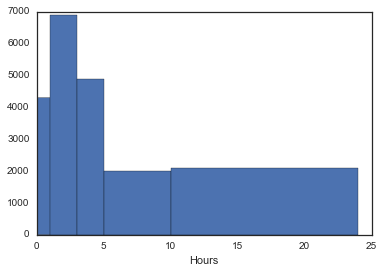

In [223]:
# TODO: draw a histogram with pre-counted data. 
val, weight = zip(*[(k, v) for k,v in data.items()])
plt.hist(val, weights=weight , bins= bins)
plt.xlabel("Hours")

As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width. One simple way to fix this is using the option [`normed`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). 

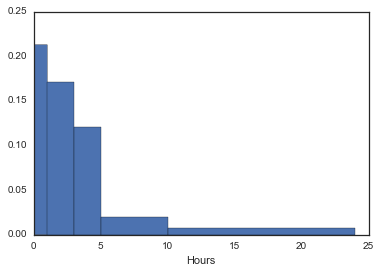

In [224]:
# TODO: fix it with normed option. 
plt.hist(val, weights=weight , bins= bins , normed = True)
plt.xlabel("Hours")

## IMDB data

How does matplotlib decide the bin width? Let's try with the IMDb data.

In [225]:
# TODO: Load IMDB data into movie_df using pandas
movie_df = pd.read_csv('imdb.csv', delimiter='\t')

Plot the histogram of movie ratings using the `plt.hist()` function.

(array([   824.,   3363.,   9505.,  21207.,  42500.,  69391.,  86470.,
         58059.,  21538.,    154.]),
 array([ 1.  ,  1.89,  2.78,  3.67,  4.56,  5.45,  6.34,  7.23,  8.12,
         9.01,  9.9 ]),
 <a list of 10 Patch objects>)

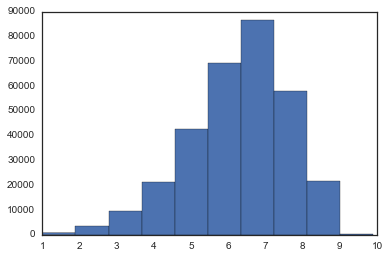

In [226]:
plt.hist(movie_df['Rating'])

Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

[   824.   3363.   9505.  21207.  42500.  69391.  86470.  58059.  21538.
    154.]
[ 1.    1.89  2.78  3.67  4.56  5.45  6.34  7.23  8.12  9.01  9.9 ]


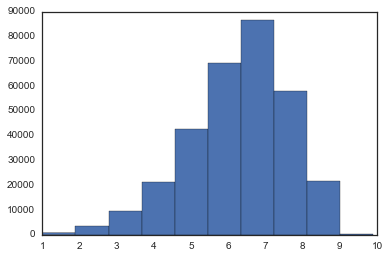

In [227]:
n_raw, bins_raw, patches = plt.hist(movie_df['Rating'])
print(n_raw)
print(bins_raw)

Actually, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies:

In [228]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies. 
if len(movie_df) == int(sum(n_raw)):
    print("The sum of the numbers in n_raw is equal to the number of movies which is " + str(len(movie_df)))

The sum of the numbers in n_raw is equal to the number of movies which is 313011


The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.0,1.89\], the second \[1.89,2.78\], and so on. We can calculate the width of each bin.

In [229]:
# TODO: calculate the width of each bin and print them. 
for i in range(0, (len(bins_raw)-1)):
    print("Bin " + str(i+1) + " : " + "[" + str(bins_raw[i]) + "," + str(bins_raw[i+1]) + "]")

Bin 1 : [1.0,1.89]
Bin 2 : [1.89,2.78]
Bin 3 : [2.78,3.67]
Bin 4 : [3.67,4.56]
Bin 5 : [4.56,5.45]
Bin 6 : [5.45,6.34]
Bin 7 : [6.34,7.23]
Bin 8 : [7.23,8.12]
Bin 9 : [8.12,9.01]
Bin 10 : [9.01,9.9]


The above `for` loop can be conveniently rewritten as the following, using [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) and the [**`zip()`**](https://docs.python.org/3/library/functions.html#zip) function. Can you explain what's going on inside the zip?

In [230]:
[ j-i for i,j in zip(bins_raw[:-1],bins_raw[1:]) ]

[0.89000000000000012,
 0.89000000000000012,
 0.88999999999999968,
 0.89000000000000057,
 0.88999999999999968,
 0.88999999999999968,
 0.89000000000000057,
 0.89000000000000057,
 0.88999999999999879,
 0.89000000000000057]

Noticed that the width of each bin is the same? This is equal-width binning. We can calculate the width as:

In [231]:
min_rating = min(movie_df['Rating'])
max_rating = max(movie_df['Rating'])
print(min_rating, max_rating)
print( (max_rating-min_rating) / 10 )

1.0 9.9
0.89


Now, let's plot the histogram where the y axis is normed.

[ 0.00295786  0.01207195  0.03411949  0.07612541  0.15255952  0.24908842
  0.31039581  0.20841067  0.07731358  0.0005528 ]
[ 1.    1.89  2.78  3.67  4.56  5.45  6.34  7.23  8.12  9.01  9.9 ]
[   824.   3363.   9505.  21207.  42500.  69391.  86470.  58059.  21538.
    154.]


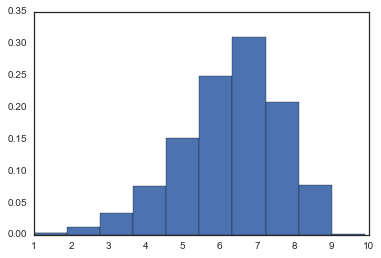

In [232]:
n, bins, patches = plt.hist(movie_df['Rating'], normed=True)
print(n)
print(bins)
print(n_raw)

In this case, the edges of the 10 bins do not change. But now `n` represents the heights of the bins. Can you verify that matplotlib has correctly normed the heights of the bins?

Hint: the area of each bin should be equal to the fraction of movies in that bin.

In [233]:
# TODO: verify that it is properly normalized. 
width = 0
total_movies = len(movie_df)
for i in range(0, (len(bins_raw)-1)):
    area = 0
    frac_movies = 0
    width = bins_raw[i+1] - bins_raw[i]
    height = n[i]
    area = str(width*height)
    frac_movies = str(n_raw[i]/total_movies)
    if area == frac_movies:
        print("Bin " + str(i+1) + " : Area of Bin = Fraction of Movies = " + str(area))

Bin 1 : Area of Bin = Fraction of Movies = 0.00263249534361
Bin 2 : Area of Bin = Fraction of Movies = 0.0107440313599
Bin 3 : Area of Bin = Fraction of Movies = 0.0303663449527
Bin 4 : Area of Bin = Fraction of Movies = 0.0677516125631
Bin 5 : Area of Bin = Fraction of Movies = 0.135777975854
Bin 6 : Area of Bin = Fraction of Movies = 0.221688694647
Bin 7 : Area of Bin = Fraction of Movies = 0.276252272284
Bin 8 : Area of Bin = Fraction of Movies = 0.18548549412
Bin 9 : Area of Bin = Fraction of Movies = 0.0688090833868
Bin 10 : Area of Bin = Fraction of Movies = 0.000491995488976


## Selecting binsize

A nice to way to explore this is using the "[small multiples](https://www.google.com/search?client=safari&rls=en&q=small+multiples&ie=UTF-8&oe=UTF-8)" with a set of sample bin sizes. In other words, pick some binsizes that you want to see and draw many plots within a single "figure". Read about [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8). For instance, you can do something like:

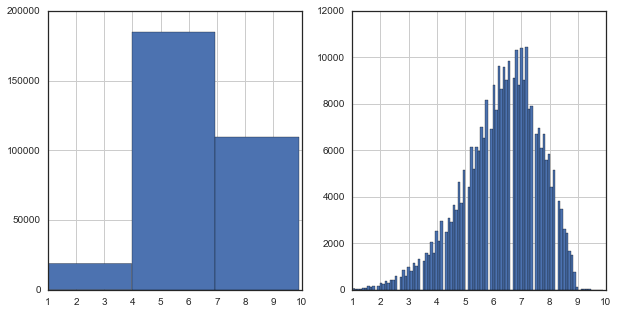

In [234]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movie_df['Rating'].hist(bins=3)
plt.subplot(1,2,2)
movie_df['Rating'].hist(bins=100)

What does the argument in `plt.subplot(1,2,1)` mean?  
http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

Ok, so create 8 subplots (2 rows and 4 columns) with the given `binsizes`. 

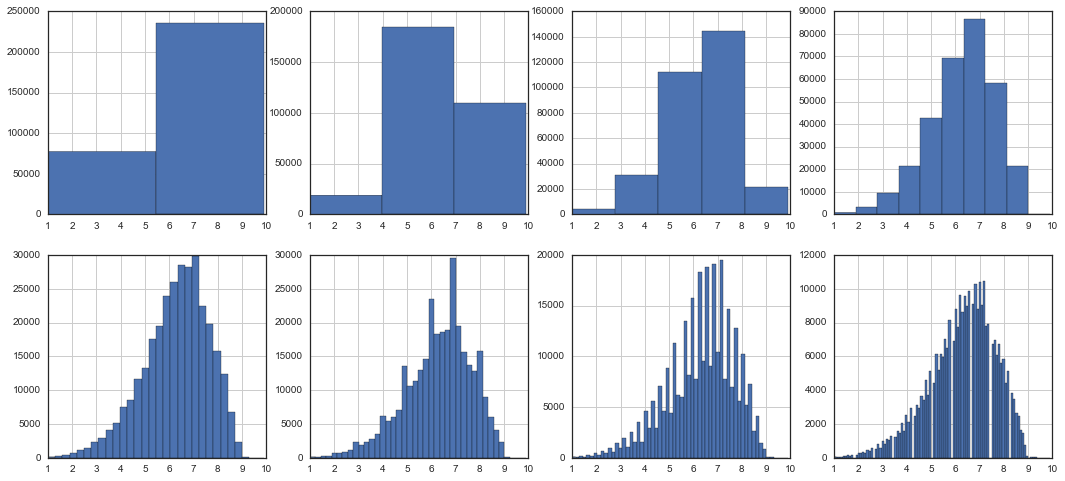

In [235]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

plt.figure(1, figsize=(18,8))
for i, bins in enumerate(binsizes): 
    # TODO: use subplot and hist() function to draw 8 plots
    plt.subplot(2,4,i+1)
    movie_df['Rating'].hist(bins=bins)

Do you notice weird patterns that emerge from `bins=40`? Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?

**Answer:**
Weird patterns start to emerge from bins = 40. These patterns emerge because as we narrow the size of the bins, we get a more intricate view of the data. Also, the values are classified in terms of numbers which are rounded off to or averaged off to the nearest whole number and hence all the intermediate values are put into adjacent bins. We obtain peaks of the data which is essentially signified by the height of the bars.

Now, let's try to apply several algorithms for finding the number of bins. 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: order is deprecated, use sort_values(...)


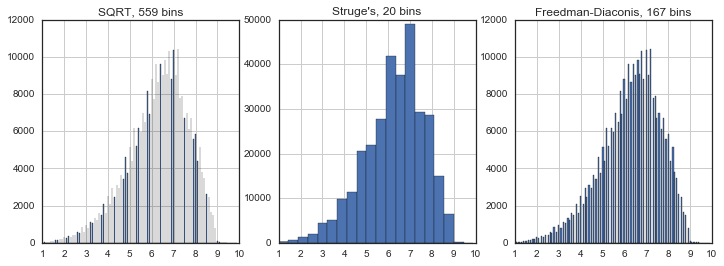

In [237]:
N = len(movie_df['Rating'])

# TODO: plot three histograms based on three formulae

plt.figure(figsize=(12,4))

# Sqrt 

nbins = int(np.sqrt(N))

plt.subplot(1,3,1)
plt.title("SQRT, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)

# Sturge's formula

nbins = int(np.ceil(np.log2(N) + 1))
plt.subplot(1,3,2)
plt.title("Struge's, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)

# Freedman-Diaconis

data = movie_df['Rating'].order()
iqr = np.percentile(data, 75) - np.percentile(data, 25)
width = 2*iqr/np.power(N, 1/3)

nbins = int((max(data) - min(data)) / width)
plt.subplot(1,3,3)
plt.title("Freedman-Diaconis, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)



# Investigating the anomalies in the histogram

Let's investigate the anormalies in the histogram. 

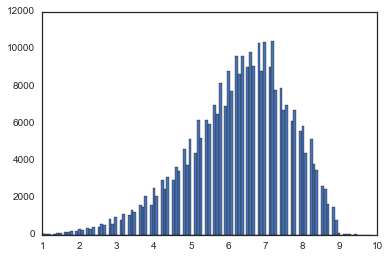

In [238]:
# TODO: draw the histogram with 120 bins
n, bins, patches = plt.hist(movie_df['Rating'], bins=120)

We can locate where the empty bins are, by checking whether the value in the n is zero or not. 

In [239]:
# TODO: print out bins that doesn't contain any values. Check whether they fall into range like [1.8XX, 1.8XX]
# useful zip: zip(bins[:-1], bins[1:], n)  what does this do?

zipped = list((zip)(bins[:-1], bins[1:], n))
for i in range(0,len(zipped)):
    if zipped[i][2] == 0.0:
        print("Bin "+str(i)+" is empty ;"+" Range : ["+str(zipped[i][0])+","+str(zipped[i][1])+"]")

Bin 3 is empty ; Range : [1.2225,1.29666666667]
Bin 7 is empty ; Range : [1.51916666667,1.59333333333]
Bin 11 is empty ; Range : [1.81583333333,1.89]
Bin 15 is empty ; Range : [2.1125,2.18666666667]
Bin 19 is empty ; Range : [2.40916666667,2.48333333333]
Bin 23 is empty ; Range : [2.70583333333,2.78]
Bin 27 is empty ; Range : [3.0025,3.07666666667]
Bin 30 is empty ; Range : [3.225,3.29916666667]
Bin 34 is empty ; Range : [3.52166666667,3.59583333333]
Bin 38 is empty ; Range : [3.81833333333,3.8925]
Bin 42 is empty ; Range : [4.115,4.18916666667]
Bin 46 is empty ; Range : [4.41166666667,4.48583333333]
Bin 50 is empty ; Range : [4.70833333333,4.7825]
Bin 54 is empty ; Range : [5.005,5.07916666667]
Bin 58 is empty ; Range : [5.30166666667,5.37583333333]
Bin 61 is empty ; Range : [5.52416666667,5.59833333333]
Bin 65 is empty ; Range : [5.82083333333,5.895]
Bin 69 is empty ; Range : [6.1175,6.19166666667]
Bin 73 is empty ; Range : [6.41416666667,6.48833333333]
Bin 77 is empty ; Range : [6.7

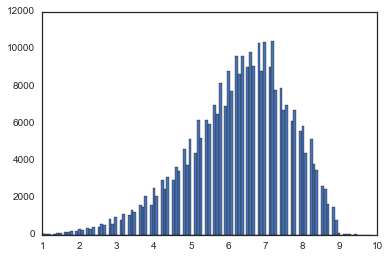

In [247]:
# TODO: draw the histogram with 120 bins
n, bins, patches = plt.hist(movie_df['Rating'], bins=120)

One way to identify the peak is comparing the number to the next bin and see whether it is much higher than the next bin. 

In [249]:
# TODO: identify peaks and print the bins with the peaks 
# e.g. 
# [1.0, 1.1]
# [1.3, 1.4]
# [1.6, 1.7]
# ...
#
# you can use zip again like zip(bins[:-1], bins[1:]  ... ) to access the data in two adjacent bins.
zipped = zip(bins[:-1], bins[1:],n)
maxheight = max(n)
for bin1, bin2, peak in zipped:
    if peak == maxheight:
        print("[" + str(bin1) + "," + str(bin2) + "]")

[7.15583333333,7.23]


Ok. They doesn't necessarilly cover the integer values. Let's see the minimum number of votes. 

In [250]:
movie_df.describe()

,Year,Rating,Votes
count,313011.000000,313011.000000,3.130110e+05
mean,1988.418334,6.296195,1.691232e+03
std,26.636414,1.363866,1.859371e+04
min,1874.000000,1.000000,5.000000e+00
25%,1974.000000,5.500000,1.000000e+01
50%,1999.000000,6.500000,2.500000e+01
75%,2009.000000,7.300000,1.105000e+02
max,2017.000000,9.900000,1.511933e+06


Ok, the minimum number of votes is 5 not 1. IMDB may only keep the rating information for movies with at least 5 votes. This may explain why the most frequent ratings are like 6.4 and 6.6. Let's plot the histogram with only the rows with 5 votes. Set the binsize 30. 

(array([   21.,    23.,    44.,    40.,   141.,   133.,   442.,   250.,
          584.,   412.,  1030.,   611.,  1400.,   673.,   815.,  1696.,
          922.,  1806.,  1017.,  1809.,   818.,  1469.,   689.,  1171.,
          655.,   673.,   243.,    10.,     5.,     4.]),
 array([ 1.        ,  1.29333333,  1.58666667,  1.88      ,  2.17333333,
         2.46666667,  2.76      ,  3.05333333,  3.34666667,  3.64      ,
         3.93333333,  4.22666667,  4.52      ,  4.81333333,  5.10666667,
         5.4       ,  5.69333333,  5.98666667,  6.28      ,  6.57333333,
         6.86666667,  7.16      ,  7.45333333,  7.74666667,  8.04      ,
         8.33333333,  8.62666667,  8.92      ,  9.21333333,  9.50666667,
         9.8       ]),
 <a list of 30 Patch objects>)

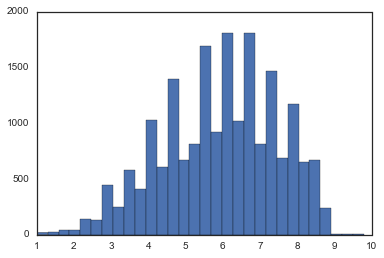

In [251]:
# TODO: plot the histogram only with ratings that have the minimum number of votes.
min_votes = movie_df[movie_df['Votes'] == 5]
plt.hist(min_votes['Rating'], bins=30)

Then, print out what are the most frequent rating values. Use `value_counts()` function for dataframe. 

In [252]:
# TODO: filter out the rows with the min number of votes (5) and then `value_counts()` them. 
# sort the result to see what are the most common numbers. 
min_votes = movie_df[movie_df['Votes'] == 5]
min_votes['Rating'].value_counts(sort=True, ascending=False)

6.4    1017
6.6     932
6.2     923
5.8     922
6.0     883
6.8     877
5.6     861
5.4     835
7.0     818
5.2     815
4.8     760
7.2     735
7.4     734
7.6     689
5.0     673
8.2     655
4.6     640
7.8     621
4.4     611
4.2     565
8.0     550
4.0     465
3.8     412
8.4     366
8.6     307
3.6     295
3.4     289
3.2     250
8.8     243
2.8     226
3.0     216
2.6     133
2.4      81
2.2      60
2.0      40
1.8      28
1.4      23
1.6      16
1.0      15
1.2       6
9.2       5
9.4       5
9.0       5
9.8       2
9.6       2
Name: Rating, dtype: int64

# Boxplot

Let's look at the example data that we looked at during the class. 

In [253]:
data = [-1, 3, 3, 4, 15, 16, 16, 17, 23, 24, 24, 25, 35, 36, 37, 46]

The [**`numpy.percentile()`**](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html) function provides a way to calculate the percentiles. Note that using the option `interpolation`, you can specify which value to take when the percentile value lies in between numbers. The default is linear. 

In [254]:
print(np.percentile(data, 25))
print(np.percentile(data, 50), np.median(data))
print(np.percentile(data, 75))

12.25
20.0 20.0
27.5


Can you explain why do you get those first and third quartile values? The first quantile value is not 4, not 15, and not 9.5. Why?

Let's draw a boxplot with matplotlib. 

{'boxes': [<matplotlib.lines.Line2D at 0x28e6febc828>],
 'caps': [<matplotlib.lines.Line2D at 0x28e6fec0c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x28e73198cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x28e6fec4d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x28e6febca20>,
  <matplotlib.lines.Line2D at 0x28e6fec0b00>]}

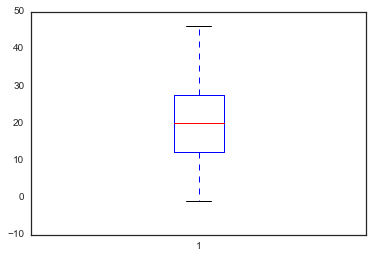

In [255]:
# TODO: draw a boxplot of the data
plt.boxplot(data)